## OLS vs gradient descent (no intercept)

$$SSE = \Sigma{(y_{i} - \hat{y})^2} = \Sigma{(y_{i} - \beta_{1}x_{i})^2}$$

$$\dfrac{\partial{SSE}}{\partial{\beta_{1}}} = -2x_{1}\Sigma{(y_{i} - \beta_{1}x_{i})} =-2\Sigma{y_{i}x_{i}} + 2\beta_{1}\Sigma{x_{i}^2}$$

$$\dfrac{\partial^2{SSE}}{\partial{\beta_{1}}^2} = 2\Sigma{x_{1}^2}$$

GD coef updating formula
$$\beta_{1, i} = \beta_{1, i-1} - \alpha \dfrac{\partial{SSE}}{\partial{\beta_{1,i-1}}}$$

Newton coef update formula
$$\beta_{1, i} = \beta_{1, i-1} - \dfrac{f'(x)}{f''(x)} = \beta_{1, i-1} - \dfrac{-2\Sigma{y_{i}x_{i}} + 2\beta_{1, i-1}\Sigma{x_{i}^2}}{2\Sigma{x_{1}^2}}$$

In [480]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

df = sns.load_dataset('diamonds')
df['ln_price'] = df.price.apply(np.log)  # lhs var is ln price


In [481]:
## Canned OLS

beta = sm.OLS(endog=df.ln_price, exog=df.carat).fit().params.carat

print(f'beta = {beta}, canned OLS')

beta = 7.726975499243918, canned OLS


In [482]:
## Newton method

beta = 0  # initial guess
gap = 1
tol = 2.2204e-16
it = 0

def fd(y,x,beta):
    '''first derivative'''
    return  -2*(y * x).sum() + 2*beta*sum(x**2)

def sd(x):
    '''second derivative'''
    return 2 * (x**2).sum()

while gap > tol:
    beta_new = beta - fd(y,x,beta)/sd(x)
    gap = beta_new - beta
    beta = beta_new
    it += 1

print(f'beta = {beta}, number of iterations = {it-1}')

beta = 7.726975499244868, number of iterations = 2


<AxesSubplot:title={'center':'SSE'}, xlabel='b1'>

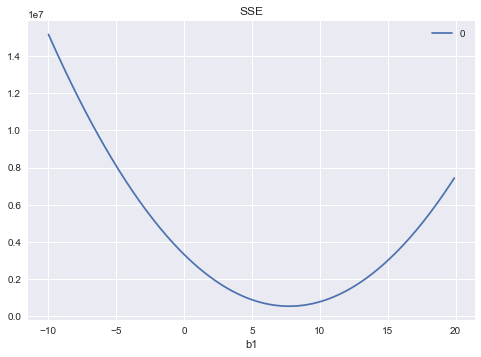

In [483]:
## Plot SSE -->  sum( (Y - (beta*X))**2  )
# iterate over beta1 values between -10 and 20, calculate SSE each iter and plot
# plot is minimized ~7.7, ie confirming OLS and newton method

y, x = df.ln_price, df.carat
sse = [sum((y - beta*x)**2) for beta in np.arange(-10,20,0.1)]
pd.DataFrame(sse, index=np.arange(-10,20,0.1)).plot(title='SSE',xlabel='b1')

In [484]:
## Gradient descent

# 5000 epochs, try combinations of alpha and initial beta
# 5*5*5000 = 125,000 total iterations
# in python, x -= y is equivelant to x = x - y, etc.

y,x = df.ln_price, df.carat
niters = int(5E3)

for alpha in [1, 0.1, 0.01, 0.001]:        # try various alpha params
    for beta in [-5,-1,0,1,5]:             # try various initial beta guesses
        beta_i = beta                      # save initial beta value for log
        for i in range(niters):            # iterate through 5000 epochs
            beta -= alpha*fd(y,x,beta)/len(y)

        print(f'{alpha=}, initial beta = {beta_i}, final beta = {beta}')



alpha=1, initial beta = -5, final beta = 7.726975499244866
alpha=1, initial beta = -1, final beta = 7.726975499244866
alpha=1, initial beta = 0, final beta = 7.726975499244866
alpha=1, initial beta = 1, final beta = 7.726975499244866
alpha=1, initial beta = 5, final beta = 7.726975499244868
alpha=0.1, initial beta = -5, final beta = 7.726975499244865
alpha=0.1, initial beta = -1, final beta = 7.726975499244865
alpha=0.1, initial beta = 0, final beta = 7.726975499244865
alpha=0.1, initial beta = 1, final beta = 7.726975499244865
alpha=0.1, initial beta = 5, final beta = 7.726975499244865
alpha=0.01, initial beta = -5, final beta = 7.726975499244843
alpha=0.01, initial beta = -1, final beta = 7.726975499244843
alpha=0.01, initial beta = 0, final beta = 7.726975499244843
alpha=0.01, initial beta = 1, final beta = 7.726975499244843
alpha=0.01, initial beta = 5, final beta = 7.726975499244843
alpha=0.001, initial beta = -5, final beta = 7.724681842781127
alpha=0.001, initial beta = -1, fina